# **Aula Teste 29/01/2024**
## Prof Paulo Marcotti pmarcotti@gmail.com (11) 98153-8898
Avaliação de vibração em eixo de máquina com rolamento com defeito na pista externa, submetido à frequência de 90 Hz equivalente à rotação de 54.4 RPM


In [ ]:
# ler arquivo csv para um dataframe da biblioteca pandas
import pandas as pd

# arquivo pequeno para validar a leitura
df = pd.read_csv("/content/Defeito de pista 90hz pequeno.csv")
print(df)

    dados falha
0   -0.09    PE
1   -0.10    PE
2    0.25    PE
3    0.23    PE
4    0.15    PE
5    0.14    PE
6    0.09    PE
7   -0.14    PE
8    0.22    PE
9   -0.32    PE
10   0.35    PE
11   0.10    PE
12   0.24    PE
13   0.05    PE
14   0.07    PE
15  -0.03    PE
16  -0.24    PE
17   0.27    PE


In [ ]:
print(df.head(5))
print(df.tail(5))

   dados falha
0  -0.09    PE
1  -0.10    PE
2   0.25    PE
3   0.23    PE
4   0.15    PE
    dados falha
13   0.05    PE
14   0.07    PE
15  -0.03    PE
16  -0.24    PE
17   0.27    PE


In [ ]:
# arquivo com frequencia de 90 Hz sem defeitos (normal)
df_Normal90Hz = pd.read_csv("/content/normal 90hz.csv")
print(df_Normal90Hz)

        dados falha
0        0.00     N
1       -0.16     N
2       -0.00     N
3        0.10     N
4        0.26     N
...       ...   ...
683563   0.13     N
683564   0.12     N
683565   0.17     N
683566   0.04     N
683567  -0.07     N

[683568 rows x 2 columns]


In [ ]:
print(df_Normal90Hz.head(10))
print(df_Normal90Hz.tail(10))

   dados falha
0   0.00     N
1  -0.16     N
2  -0.00     N
3   0.10     N
4   0.26     N
5   0.00     N
6   0.09     N
7  -0.00     N
8  -0.05     N
9   0.09     N
        dados falha
683558   0.25     N
683559  -0.06     N
683560  -0.07     N
683561  -0.08     N
683562  -0.01     N
683563   0.13     N
683564   0.12     N
683565   0.17     N
683566   0.04     N
683567  -0.07     N


In [ ]:
# arquivo com frequencia de 90 Hz com defeito na pista externa
df_PistaExterna90Hz = pd.read_csv("/content/Defeito de pista 90hz.csv")
print(df_PistaExterna90Hz)

        dados falha
0       -0.09    PE
1       -0.10    PE
2        0.25    PE
3        0.23    PE
4        0.15    PE
...       ...   ...
449240  -0.20    PE
449241   0.20    PE
449242  -0.25    PE
449243   0.25    PE
449244  -0.07   NaN

[449245 rows x 2 columns]


## Gráficos com o objetivo de "insight" sobre os dados disponíveis

Ferramenta matplotlib (amplamente utilizada)

Ferramenta https://ecoagi.ai/pt/topics/Pandas/pandas-dataframe-plot


In [ ]:
print(df_Normal90Hz.dados[0:20])

0     0.00
1    -0.16
2    -0.00
3     0.10
4     0.26
5     0.00
6     0.09
7    -0.00
8    -0.05
9     0.09
10   -0.18
11    0.14
12   -0.10
13    0.18
14    0.06
15    0.08
16    0.04
17   -0.10
18   -0.12
19    0.13
Name: dados, dtype: float64


<Axes: >

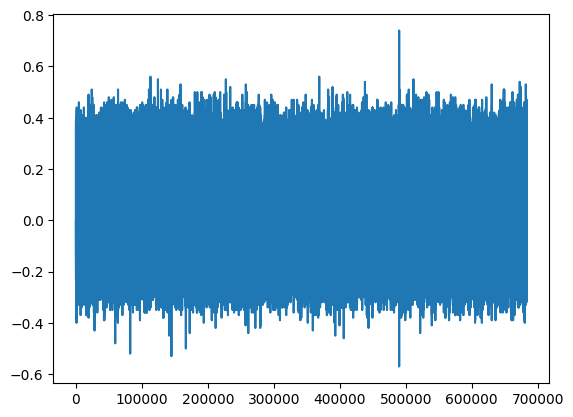

In [ ]:
df_Normal90Hz.dados.plot()
#df_Normal90Hz.dados.plot(kind='line', y='dados')

<Axes: >

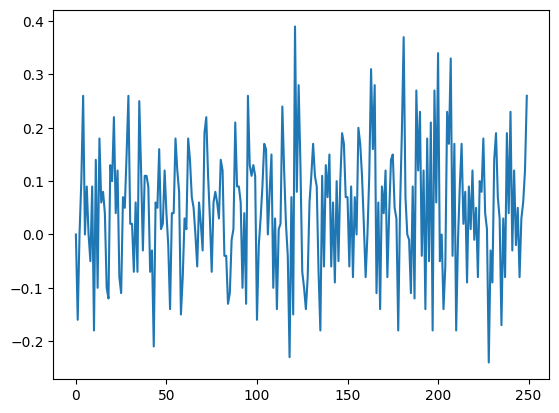

In [ ]:
df_Normal90Hz[0:250].dados.plot()
#df_Normal90Hz[0:250].dados.plot(kind='line', y='dados')

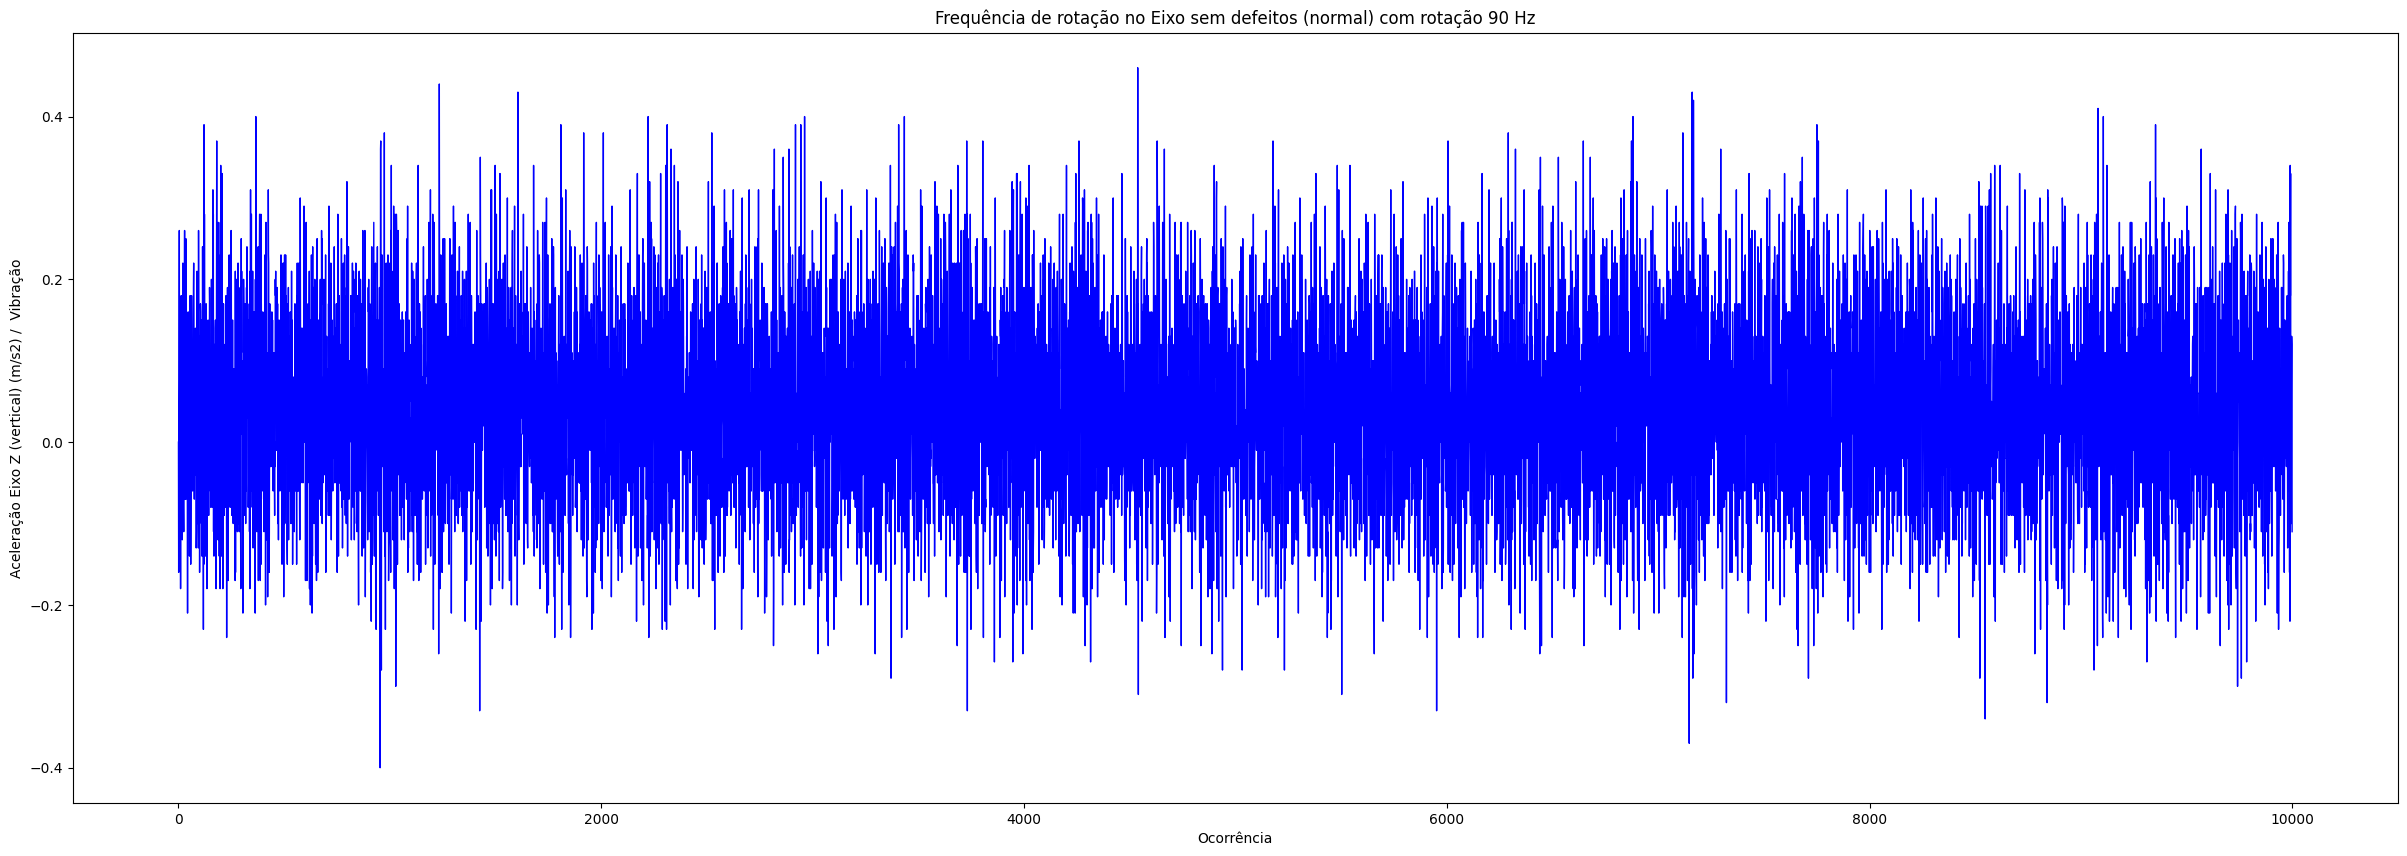

In [ ]:
import matplotlib.pyplot as plt

df_Normal90Hz[0:10000].dados.plot(kind='line', y='dados', figsize=(30, 10), color='blue', linewidth=1)
plt.title('Frequência de rotação no Eixo sem defeitos (normal) com rotação 90 Hz')
plt.xlabel('Ocorrência')
plt.ylabel('Aceleração Eixo Z (vertical) (m/s2) /  Vibração')
plt.show()

## Comparação Normal Versus Defeito na Pista Externa

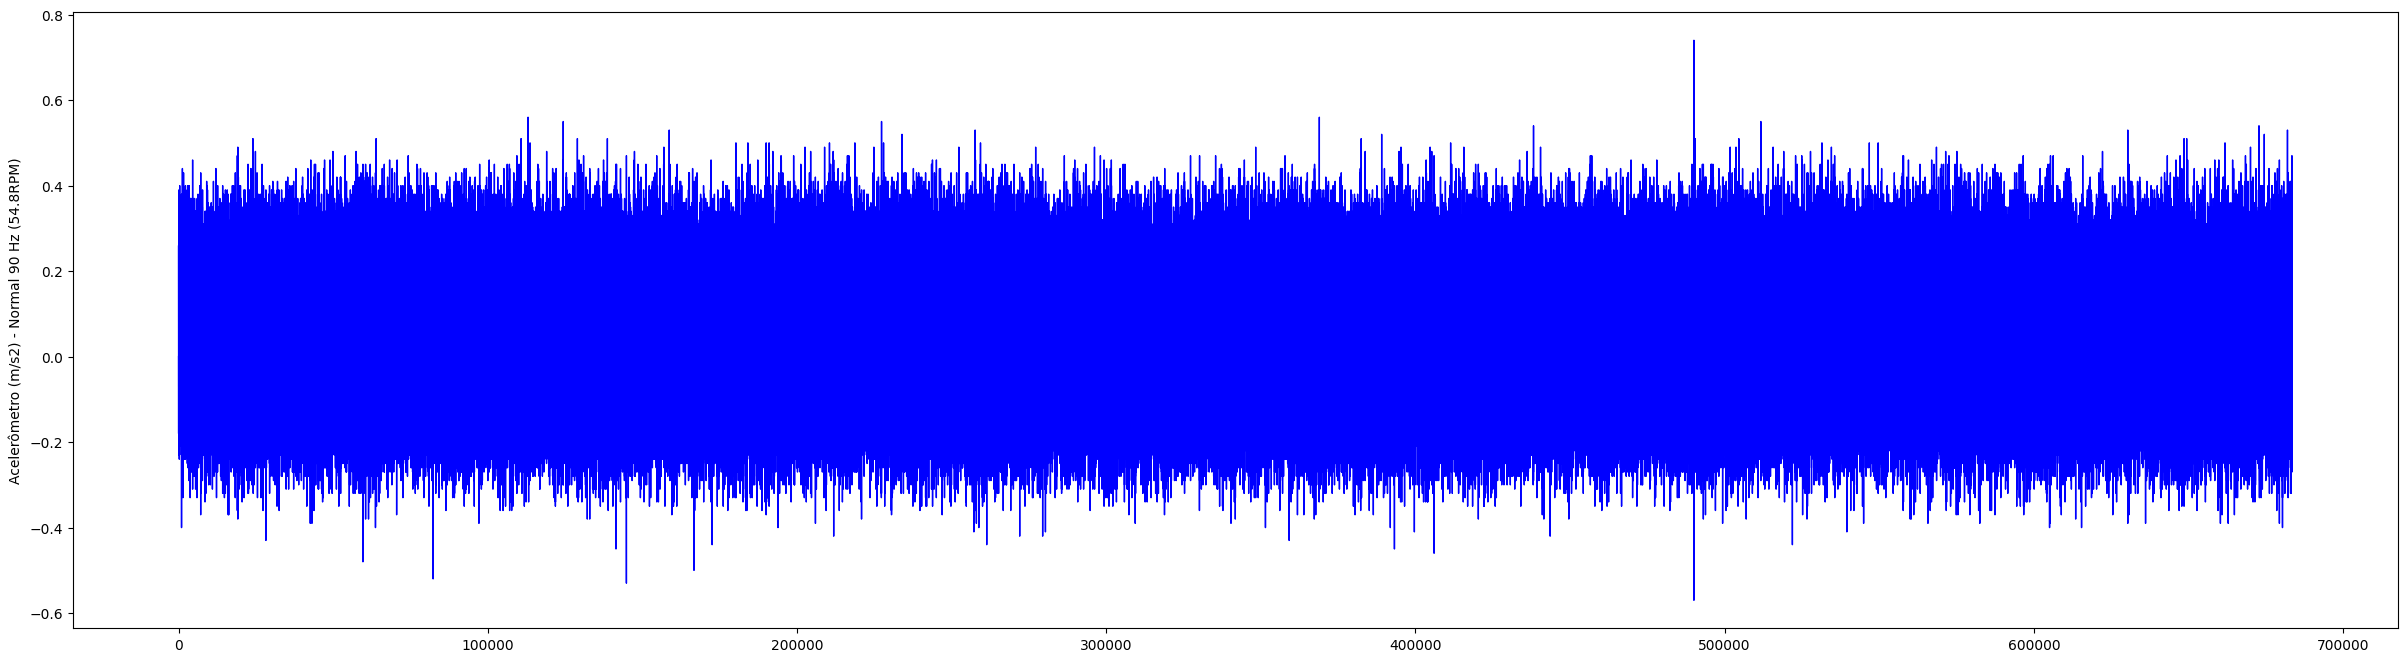

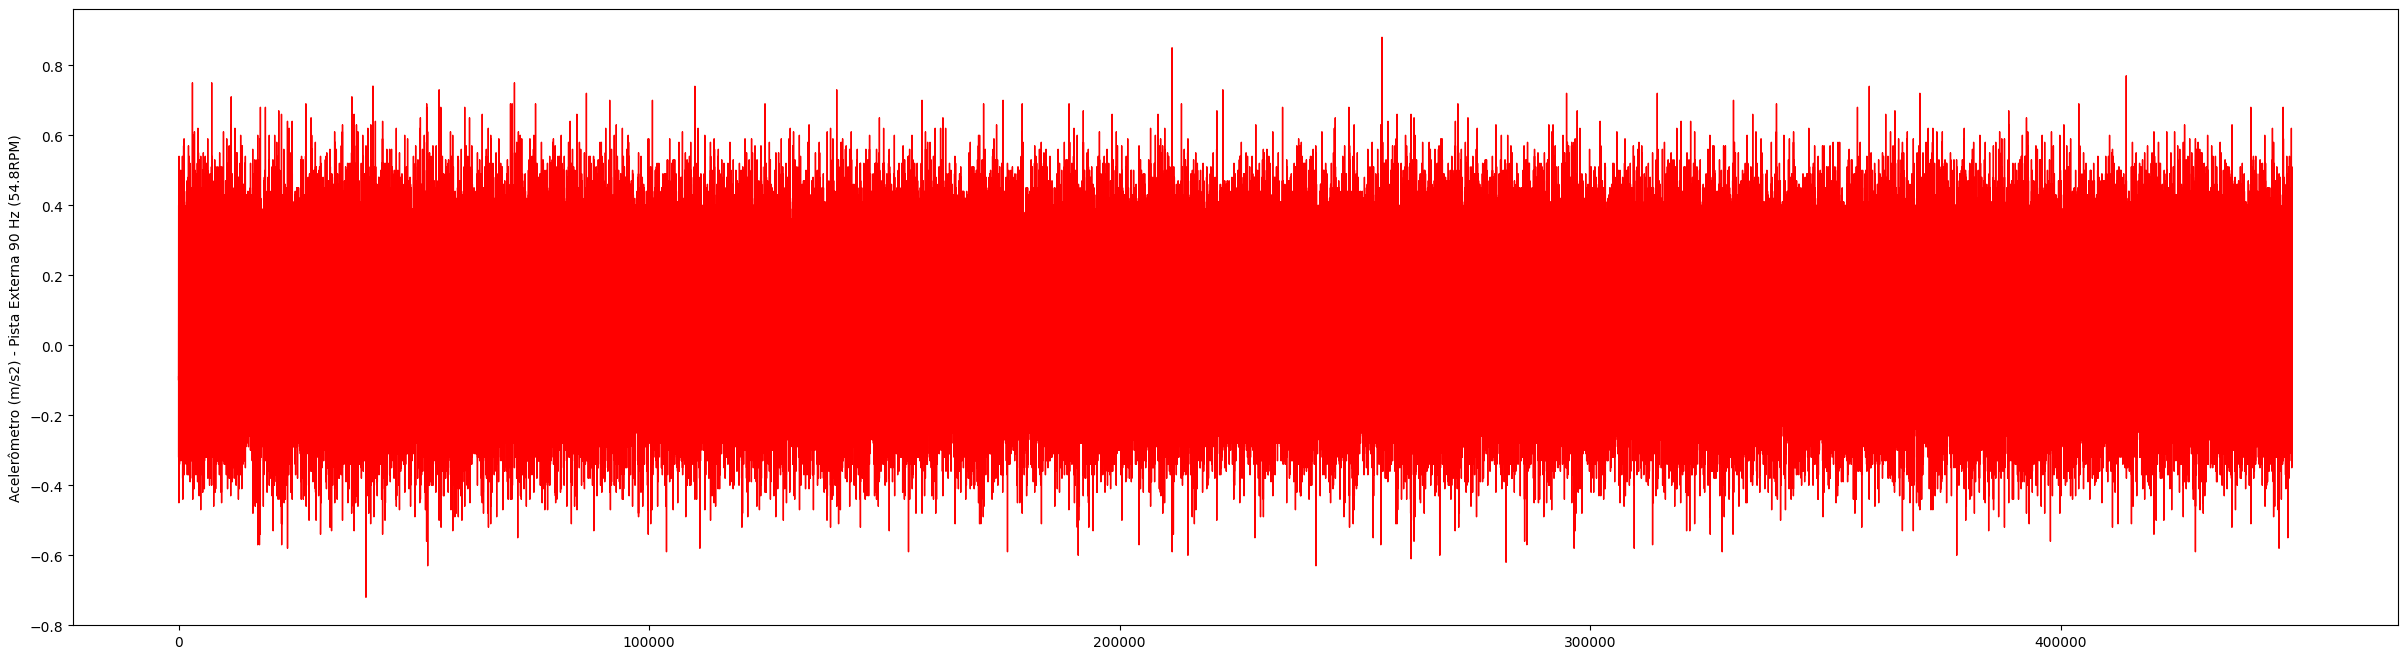

In [ ]:
qtdObservacoes = 800000
df_Normal90Hz[0:qtdObservacoes].dados.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz (54.8RPM)')
plt.show()
df_PistaExterna90Hz[0:qtdObservacoes].dados.plot(kind='line', y='dados', figsize=(30, 8), color='red', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Pista Externa 90 Hz (54.8RPM)')
plt.show()

### Divisão de dados de treinamento e testes para o Aprendizado de Máquina

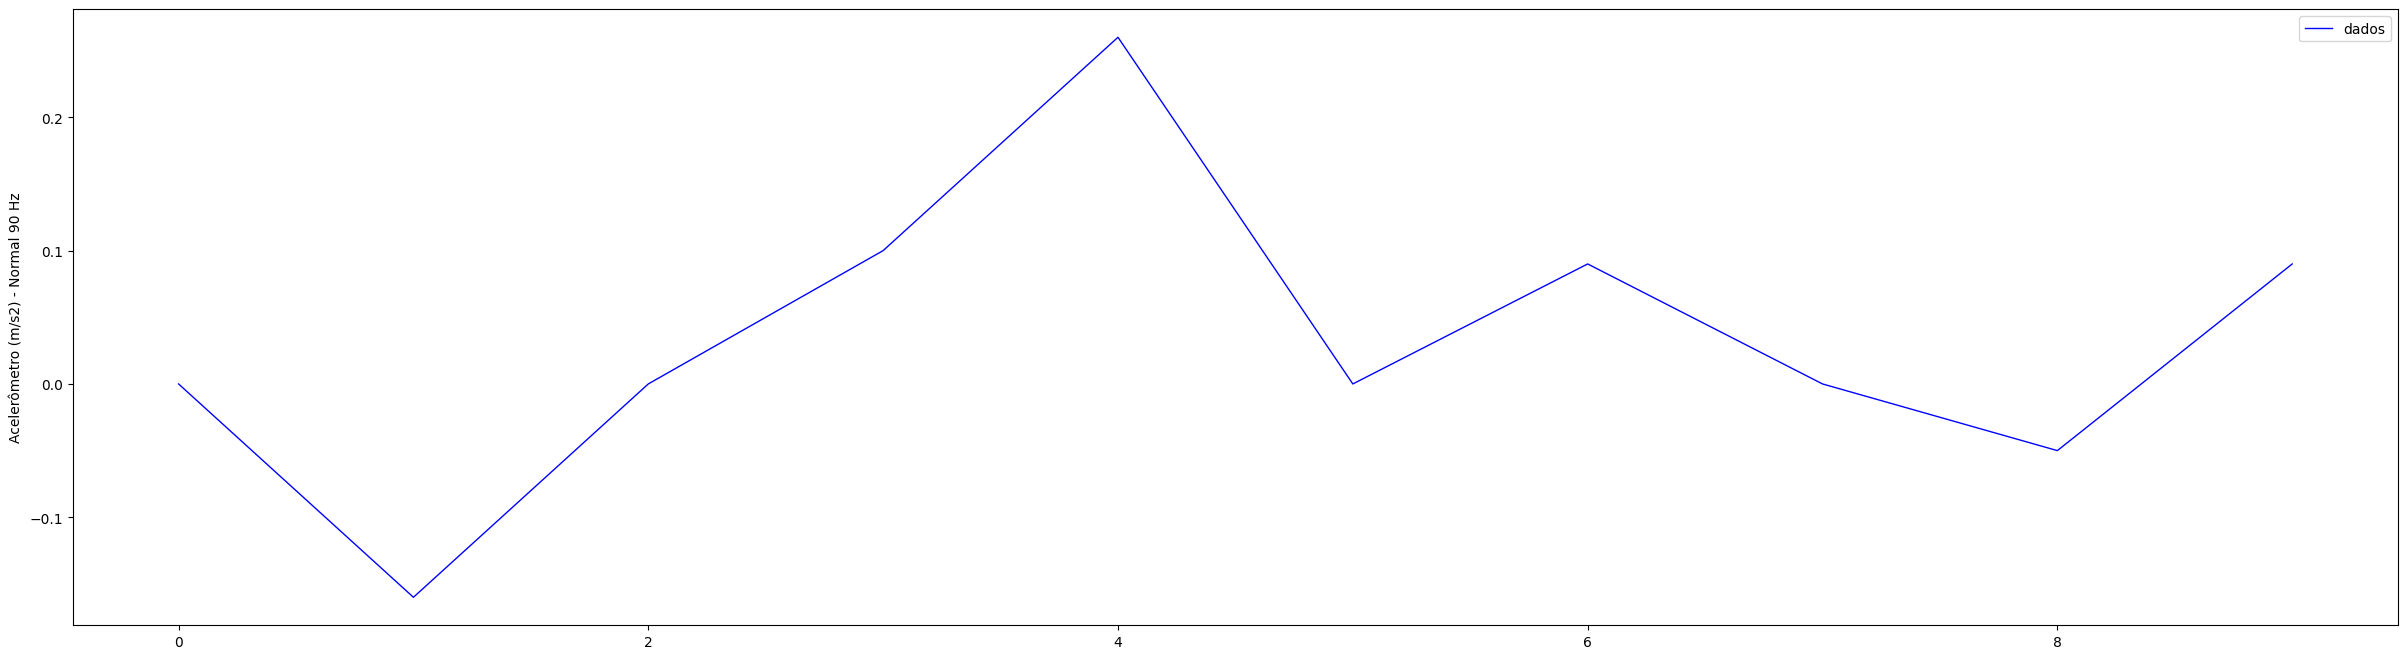

In [ ]:
qtdObservacoes = 10
df_Normal90Hz[0:qtdObservacoes].plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

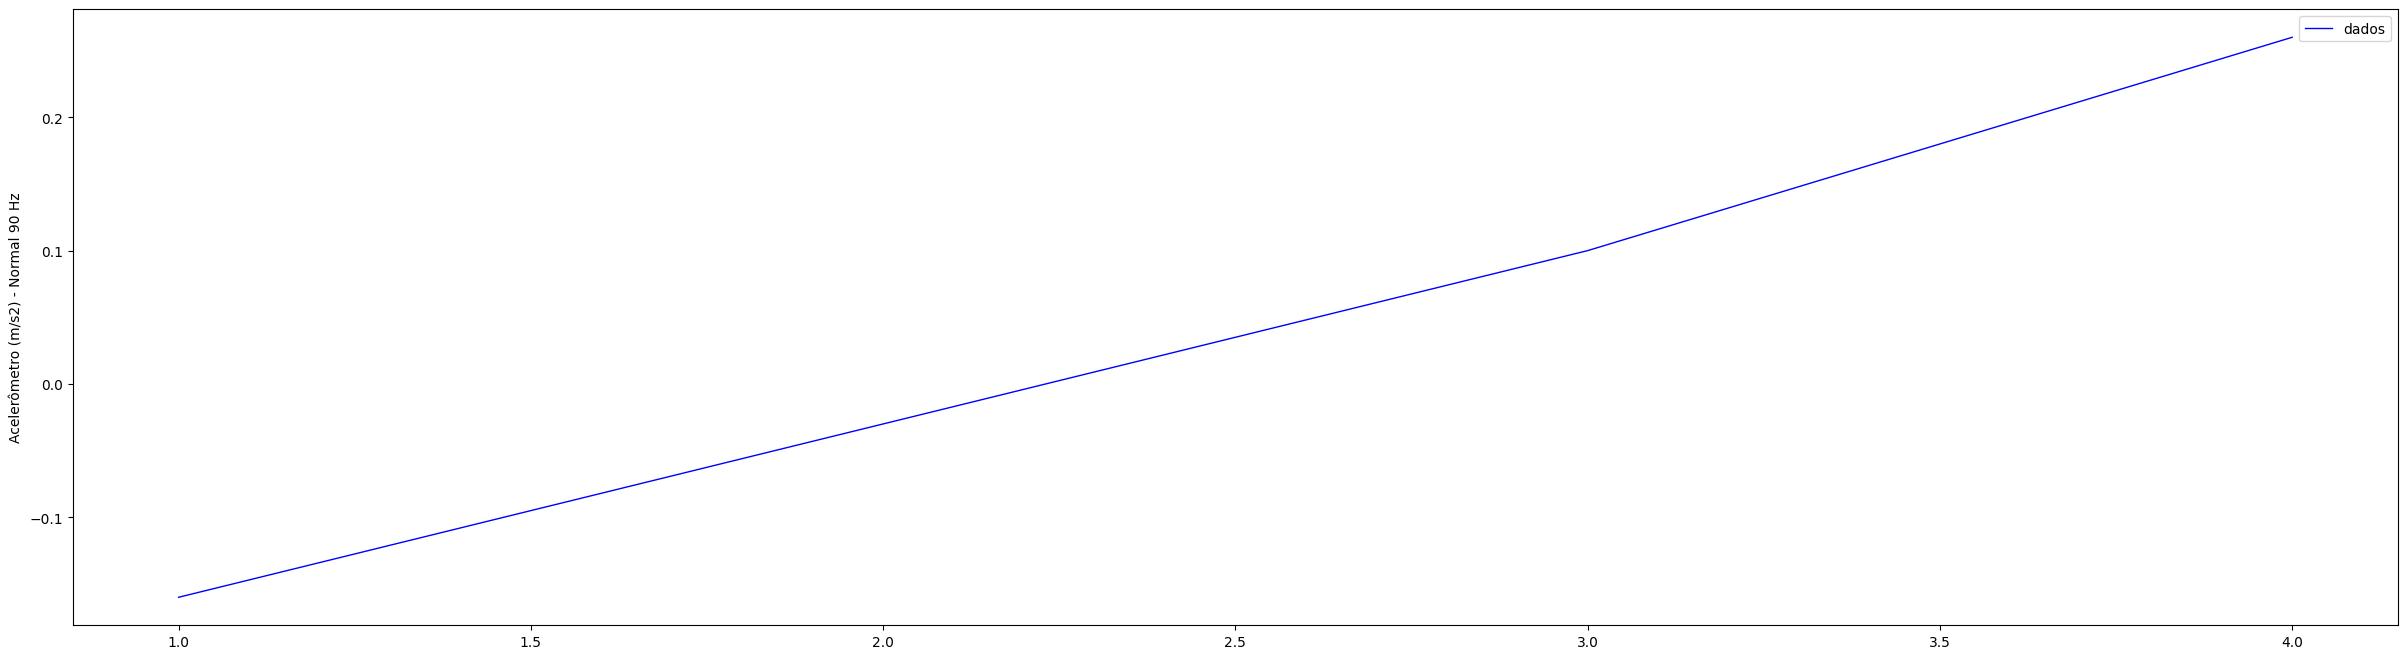

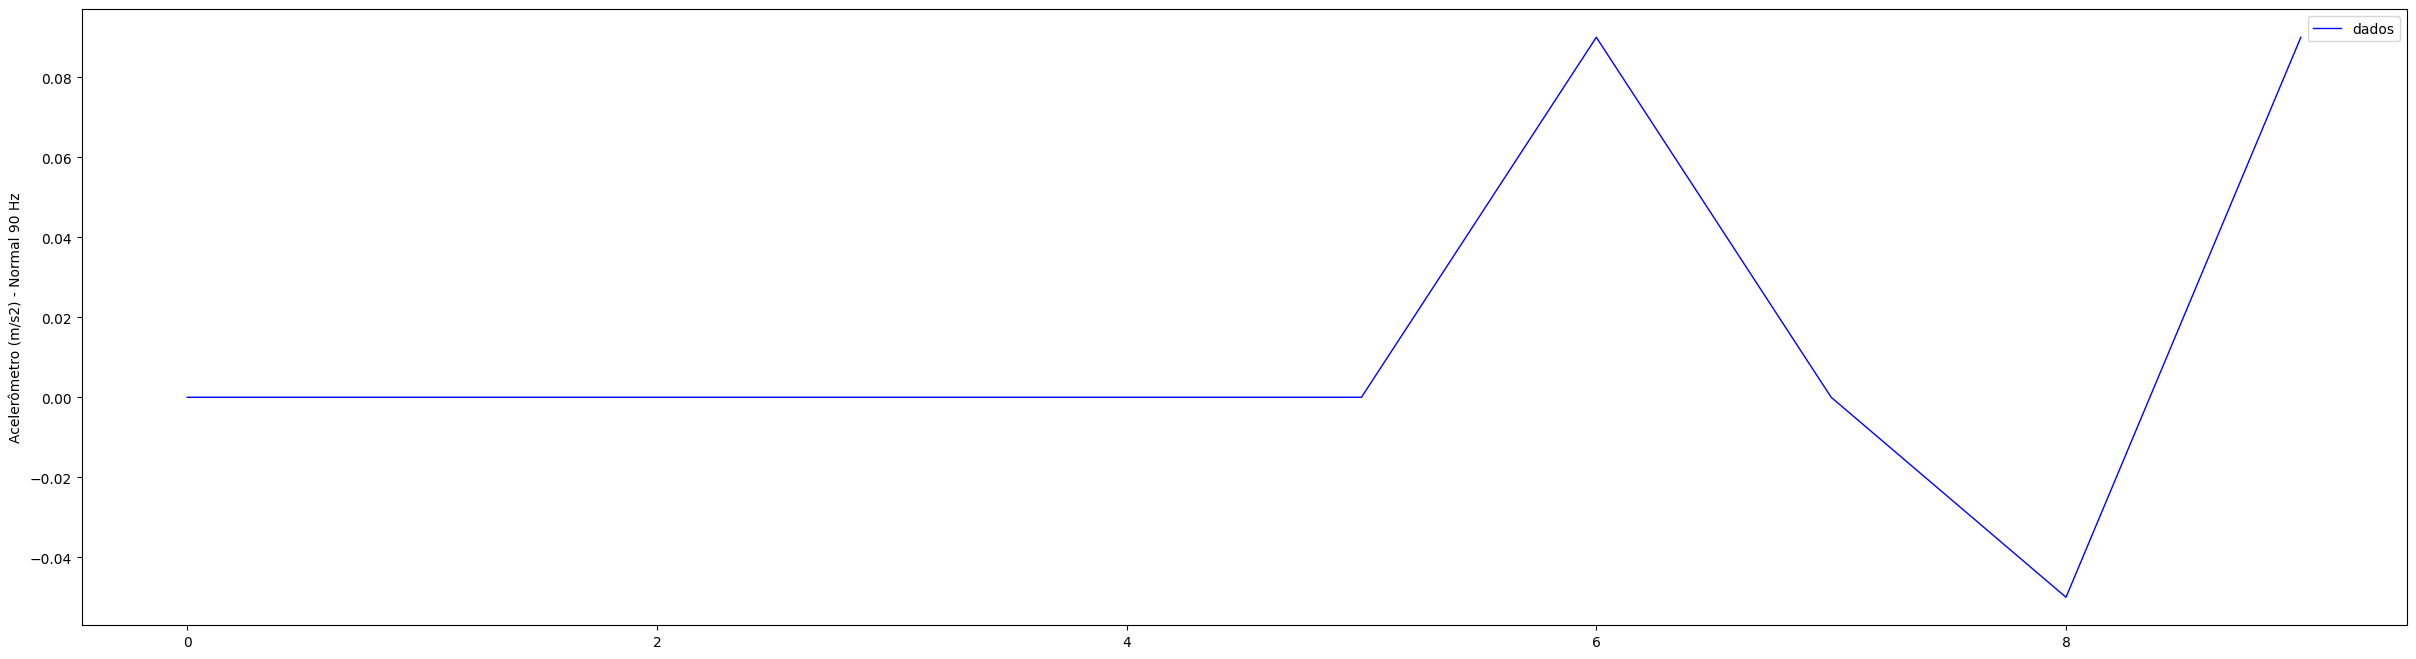

In [ ]:
#qtdObservacoes = 10

#print(df_Normal90Hz.dados[1:3])
#print(df_Normal90Hz.dados[6:10])
df_teste = pd.concat([df_Normal90Hz[1:2], df_Normal90Hz[3:5]])
#print(df_teste)

df_treinamento = pd.concat([df_Normal90Hz[0:1], df_Normal90Hz[2:3], df_Normal90Hz[5:10]])
#print(df_treinamento)

df_teste.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

df_treinamento.plot(kind='line', y='dados', figsize=(30, 8), color='blue', linewidth=1)
plt.ylabel('Acelerômetro (m/s2) - Normal 90 Hz')
plt.show()

## Transformar Série Temporal em Imagem equivalente (Jason ML Mastery)
jason@machinelearningmastery.com

-1.0 1.0


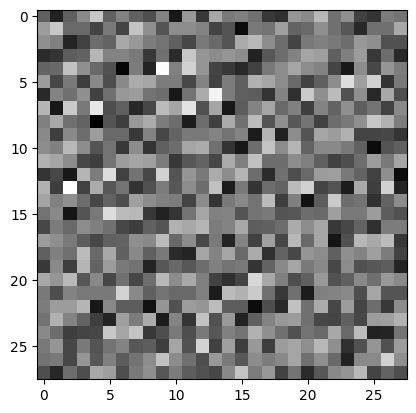

In [ ]:
# Assumir como valor minimo e maximo do sinal do acelerometro -1.0 a 1.0 (m/s2)
#minAceler = min(df_Normal90Hz.dados)
#maxAceler = max(df_Normal90Hz.dados)
#print(minAceler, maxAceler)
#minAceler = min(df_PistaExterna90Hz.dados)
#maxAceler = max(df_PistaExterna90Hz.dados)
#print(minAceler, maxAceler)

xJanela = 28
# processamento de transformacao da serie temporal em milhares de imagens
# otimizar processamento
# nao precisa trabalhar com a função concat do pandas
#janela = pd.concat([df_Normal90Hz.dados[0:xJanela*xJanela]])
# eliminada uma transformação em List da janela (slice do dataframe completo)
#janela = [df_Normal90Hz.dados[0:xJanela*xJanela]]
# transformar valores de cinza de 0 a 255
#janela = df_Normal90Hz.dados[0:xJanela*xJanela]

#
#minAceler = min(min(df_Normal90Hz.dados), min(df_PistaExterna90Hz.dados))
#maxAceler = max(max(df_Normal90Hz.dados), max(df_PistaExterna90Hz.dados))
# para o mesmo intervalo entre todos os experimentos
#minAceler = min(min(df_Normal90Hz.dados), min(df_PistaExterna90Hz.dados), -1.0)
#maxAceler = max(max(df_Normal90Hz.dados), max(df_PistaExterna90Hz.dados), +1.0)
minAceler = -1.0 # 25.0
maxAceler = +1.0 #25.0

print(minAceler, maxAceler)

#janela = df_Normal90Hz.dados[0:xJanela*xJanela] / (maxAceler - minAceler) * 255
#print(janela)
# transformar janela em int com numpy
janela = ( (df_Normal90Hz.dados[0:xJanela*xJanela]  - minAceler) / (maxAceler - minAceler) ) * 255
#print(janela)
#janela = janela.apply(pd.to_int)
janela = janela.astype(int)
#print(janela)
#print(type(janela))

import numpy as np
# figura equivalente a janela em tons de cinza
R = np.zeros([xJanela,xJanela], dtype='int')

# preencher linha a linha
for i, aceler in enumerate(janela):
  #print(aceler)
  l = i // xJanela
  c = i % xJanela
  R[l,c] = aceler

#print(R)
_=plt.imshow(R,'gray')

In [ ]:
# preencher crescente na inclinada ("insight visual de uma sazonalidade" [Marcotti, 202-])
(l,c) = (0,0) # iniciar canto superior esquerdo "raster visão computacional"
for i, aceler in enumerate(janela):
  print(l, c, i, aceler)
  R[l,c] = aceler
  l += 1
  c -= 1
  if c < 0:
      c = l
      l = 0
  else:
    l += 1
    c -= 1
    if c < 0:
      c = l
      l = 0

#  xJanela=5
#  0  1  3  6 10 l=5;c=-1
#  2  4  7 11 15
#  5  8 12
#  9 13
# 14 l=4;c=0

#print(R)
_=plt.imshow(R,'gray')

0 0 127
0 1 107
1 0 127
0 2 140
1 1 160
2 0 127
0 3 138
1 2 127
2 1 121
3 0 138
0 4 104
1 3 145
2 2 114
3 1 150
4 0 135
0 5 137
1 4 132
2 3 114
3 2 112
4 1 144
5 0 140
0 6 155
1 5 132
2 4 142
3 3 117
4 2 113
5 1 136
6 0 133
0 7 146
1 6 160
2 5 130
3 4 130
4 3 118
5 2 135
6 1 118
7 0 159
0 8 142
1 7 123
2 6 141
3 5 141
4 4 138
5 3 118
6 2 123
7 1 100
8 0 135
0 9 133
1 8 147
2 7 128
3 6 130
4 5 142
5 4 132
6 3 124
7 2 109
8 1 132
9 0 132
0 10 150
1 9 142
2 8 137
3 7 108
4 6 117
5 5 131
6 4 128
7 3 150
8 2 145
9 1 136
10 0 133
0 11 127
1 10 119
2 9 135
3 8 130
4 7 123
5 6 151
6 5 155
7 4 141
8 3 131
9 2 118
10 1 135
11 0 137
0 12 135
1 11 131
2 10 145
3 9 142
4 8 122
5 7 122
6 6 110
7 5 113
8 4 126
9 3 128
10 2 154
11 1 138
12 0 138
0 13 135
1 12 114
2 11 132
3 10 110
4 9 160
5 8 144
6 7 141
7 6 144
8 5 141
9 4 107
10 3 124
11 2 131
12 1 138
13 0 149
0 14 147
1 13 127
2 12 137
3 11 146
4 10 114
5 9 131
6 8 109
7 7 128
8 6 130
9 5 158
10 4 142
11 3 130
12 2 122
13 1 98
14 0 136
0 15 108
1 

IndexError: index 28 is out of bounds for axis 1 with size 28

## Verificar o mínimo e o máximo valor de aceleração para todos os arquivos de aquisição de dados

In [ ]:
#import os
#entries = os.listdir('/content/')
#for fileName in entries:
#  print(fileName)

from pathlib import Path

entries = Path('/content/')
for entry in entries.iterdir():
    print(entry.name)
    if not (entry.name == ".config" or entry.name == "sample_data" or entry.name == ".ipynb_checkpoints"):
      df = pd.read_csv(entry.name)
      print(entry.name, min(df.dados), max(df.dados))

# Gerar as imagens de toda a serie temporal

In [ ]:
#qtdTotalObservacoesNormal = len(df_Normal90Hz)
#qtdTotalObservacoesPistaExterna = len(df_PistaExterna90Hz)
#print(qtdTotalObservacoesNormal)
#print(qtdTotalObservacoesPistaExterna)
qtdTotalObservacoes = min(len(df_Normal90Hz), len(df_PistaExterna90Hz))
print(qtdTotalObservacoes)

#janela = df_Normal90Hz.dados[0:xJanela*xJanela] / (maxAceler - minAceler) * 255
#print(janela)
# transformar janela em int com numpy
janela = ( (df_Normal90Hz.dados[0:xJanela*xJanela]  - minAceler) / (maxAceler - minAceler) ) * 255
#print(janela)
#janela = janela.apply(pd.to_int)
janela = janela.astype(int)
#print(janela)
#print(type(janela))
